## Visualization

### Problem1

Q1) Calculate Skewness, Kurtosis using R/Python code & draw inferences on the following data.  
Hint: [Insights drawn from the data such as data is normally distributed/not, outliers, measures like mean,  
       median, mode, variance, std. deviation]  

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
car1 = pd.read_csv("Q1_a.csv")

In [2]:
car1.shape

(50, 3)

In [3]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Index   50 non-null     int64
 1   speed   50 non-null     int64
 2   dist    50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [4]:
car1.describe()

,Index,speed,dist
count,50.00000,50.000000,50.000000
mean,25.50000,15.400000,42.980000
std,14.57738,5.287644,25.769377
min,1.00000,4.000000,2.000000
25%,13.25000,12.000000,26.000000
50%,25.50000,15.000000,36.000000
75%,37.75000,19.000000,56.000000
max,50.00000,25.000000,120.000000


#### Measures of Central Tendency / First moment business decision

mean and std deviation are given above

In [20]:
car1.speed.mean() ,car1.speed.median() , car1.speed.mode()

(15.4,
 15.0,
 0    20
 dtype: int64)

In [21]:
car1.dist.mean() ,car1.dist.median() , car1.dist.mode()

(42.98,
 36.0,
 0    26
 dtype: int64)

#### Measures of Dispersion / Second moment business decision

In [18]:
car1.speed.var() ,car1.speed.std() 

(27.959183673469386, 664.0608163265307)

In [19]:
car1.dist.var() , car1.dist.std()

(664.0608163265307, 25.769377492025892)

#### Skew /Third moment business decision

In [22]:
car1.speed.skew() ,car1.dist.skew() 

(-0.11750986144663393, 0.8068949601674215)

In [23]:
car1.speed.kurt() ,car1.dist.kurt() 

(-0.5089944204057617, 0.4050525816795765)

#### View

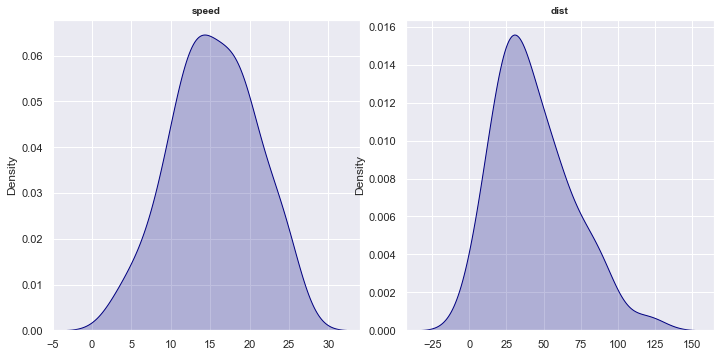

In [27]:
#display distributions for numeric data
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,5))
fig.tight_layout()
cols = ['speed','dist']
axeslist = [axes[0],axes[1]]
j=0
for col in cols:
    p= sns.kdeplot(data=car1, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=10)
    j= j+1

dist has slight right skew.speed has slight left skew.

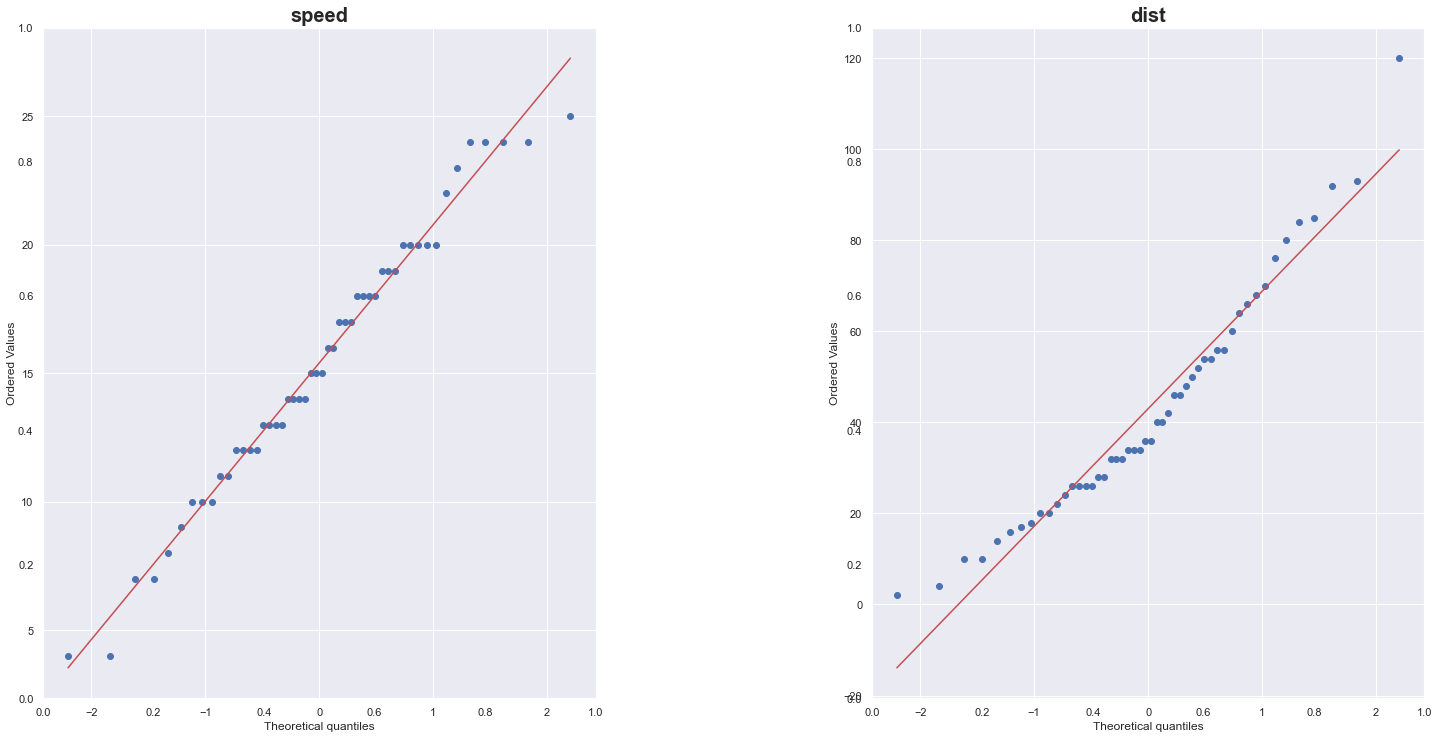

In [30]:
#Review QQ Plot for other normally distributed columns
import scipy.stats as stats
import pylab
cols = ['speed','dist']
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2]
j=0

for col in cols:
    ax = fig.add_subplot(1, 2, nfig[j])
    p=stats.probplot(car1[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1

speed is more normally distributed

In [31]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(df.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [33]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(car1.drop(['Index'],axis=1))

,column,stat,p,Distribution
0,speed,0.977649,0.457626,Gaussian
1,dist,0.951439,0.039100,Not Gaussian


<AxesSubplot:xlabel='value', ylabel='variable'>

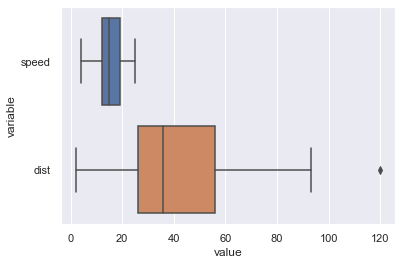

In [28]:
df = pd.DataFrame(data=car1, columns=["speed", "dist"])
sns.boxplot(x="value", y="variable", data=pd.melt(df))

In [34]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   

In [35]:
#get outliers from all numeric features
IQR_Outliers(car1, ["speed", "dist"])

Number of samples:  50

Number of rows with outliers:  1


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,speed,0,0.0,29.5,1.5
1,dist,1,2.0,101.0,-19.0


In [41]:
car1 = pd.read_csv("Q2_b.csv")

In [42]:
car1.shape

(81, 3)

In [43]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  81 non-null     int64  
 1   SP          81 non-null     float64
 2   WT          81 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB


In [44]:
car1.describe()

,Unnamed: 0,SP,WT
count,81.000000,81.000000,81.000000
mean,41.000000,121.540272,32.412577
std,23.526581,14.181432,7.492813
min,1.000000,99.564907,15.712859
25%,21.000000,113.829145,29.591768
50%,41.000000,118.208698,32.734518
75%,61.000000,126.404312,37.392524
max,81.000000,169.598513,52.997752


#### Measures of Central Tendency / First moment business decision

mean and std deviation are given above

In [45]:
car1.SP.mean() ,car1.SP.median() , car1.SP.mode()

(121.54027218037035,
 118.2086984,
 0    118.288996
 dtype: float64)

In [46]:
car1.WT.mean() ,car1.WT.median() , car1.WT.mode()

(32.412576910246905,
 32.73451818,
 0     15.712859
 1     15.753535
 2     15.769625
 3     15.823060
 4     15.847758
         ...    
 76    42.778219
 77    43.353123
 78    43.390988
 79    44.013139
 80    52.997752
 Length: 81, dtype: float64)

#### Measures of Dispersion / Second moment business decision

In [47]:
car1.SP.var() ,car1.SP.std() 

(201.11300150303703, 14.181431574528611)

In [48]:
car1.WT.var() , car1.WT.std()

(56.14224661390445, 7.492812997393198)

#### Skew /Third moment business decision

In [49]:
car1.WT.skew() ,car1.SP.skew() 

(-0.6147533255357768, 1.6114501961773586)

In [50]:
car1.WT.kurt() ,car1.SP.kurt() 

(0.9502914910300326, 2.9773289437871835)

#### View

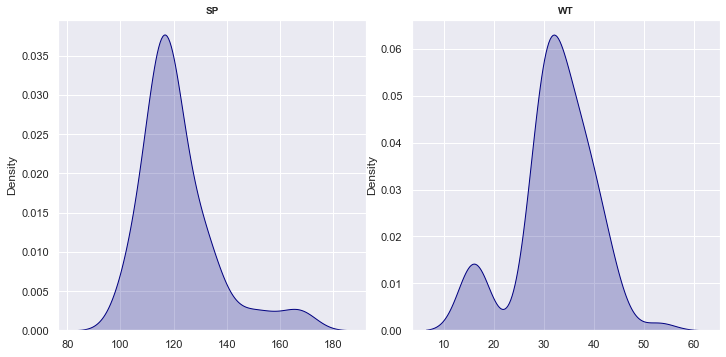

In [51]:
#display distributions for numeric data
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,5))
fig.tight_layout()
cols = ['SP','WT']
axeslist = [axes[0],axes[1]]
j=0
for col in cols:
    p= sns.kdeplot(data=car1, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=10)
    j= j+1

dist has slight right skew.speed has slight left skew.

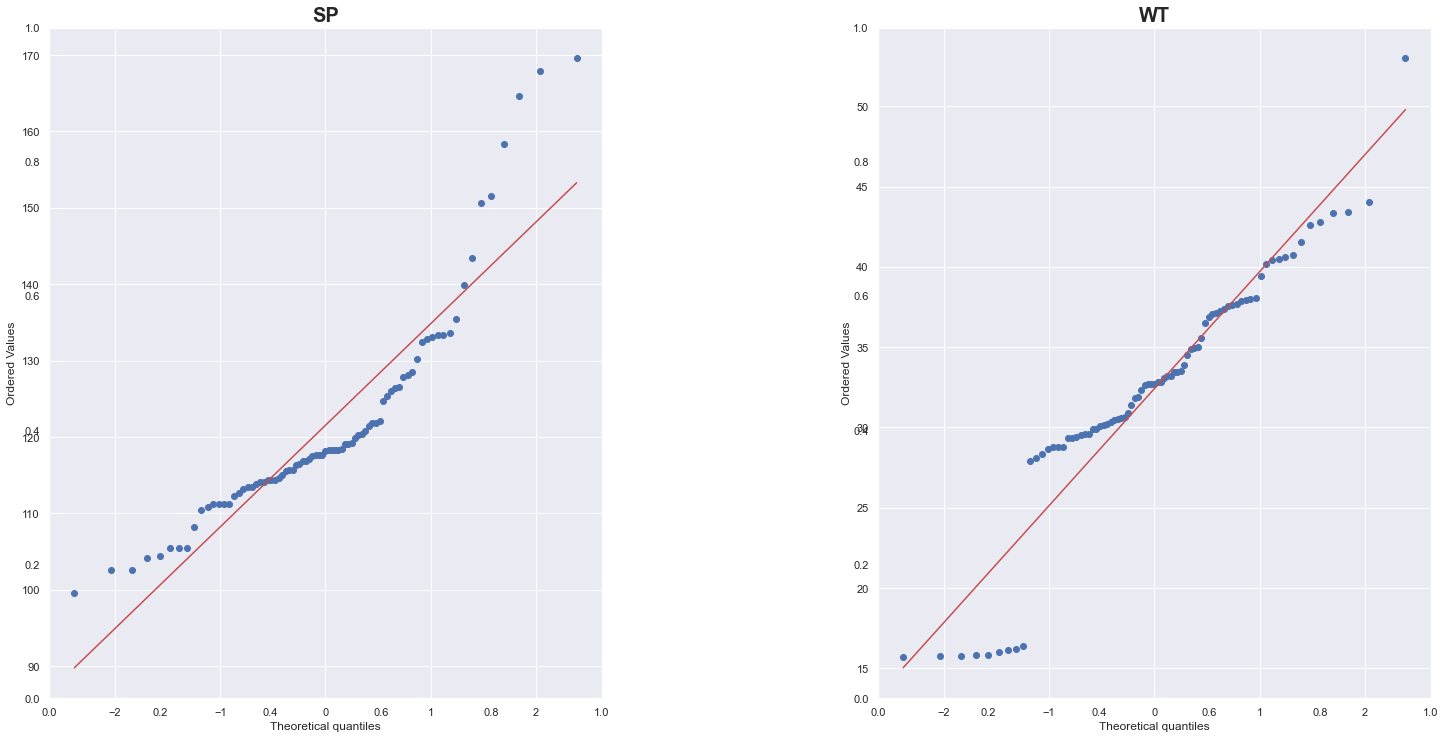

In [52]:
#Review QQ Plot for other normally distributed columns
import scipy.stats as stats
import pylab
cols = ['SP','WT']
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2]
j=0

for col in cols:
    ax = fig.add_subplot(1, 2, nfig[j])
    p=stats.probplot(car1[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1

both columns are not normally distributed

In [55]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(car1.drop(['Unnamed: 0'],axis=1))

,column,stat,p,Distribution
0,SP,0.851841,1.628403e-07,Not Gaussian
1,WT,0.912648,3.916018e-05,Not Gaussian


<AxesSubplot:xlabel='value', ylabel='variable'>

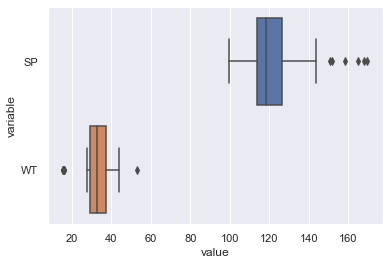

In [56]:
df = pd.DataFrame(data=car1, columns=['SP','WT'])
sns.boxplot(x="value", y="variable", data=pd.melt(df))

In [57]:
#get outliers from all numeric features
IQR_Outliers(car1, ['SP','WT'])

Number of samples:  81

Number of rows with outliers:  13


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,SP,6,7.41,145.267062,94.966394
1,WT,10,12.35,49.093659,17.890634


### Problem2

Q2) Draw inferences about the following boxplot & histogram.    
Hint: [Insights drawn from the plots about the data such as whether data is normally distributed/not,   
       outliers, measures like mean, median, mode, variance, std. deviation  


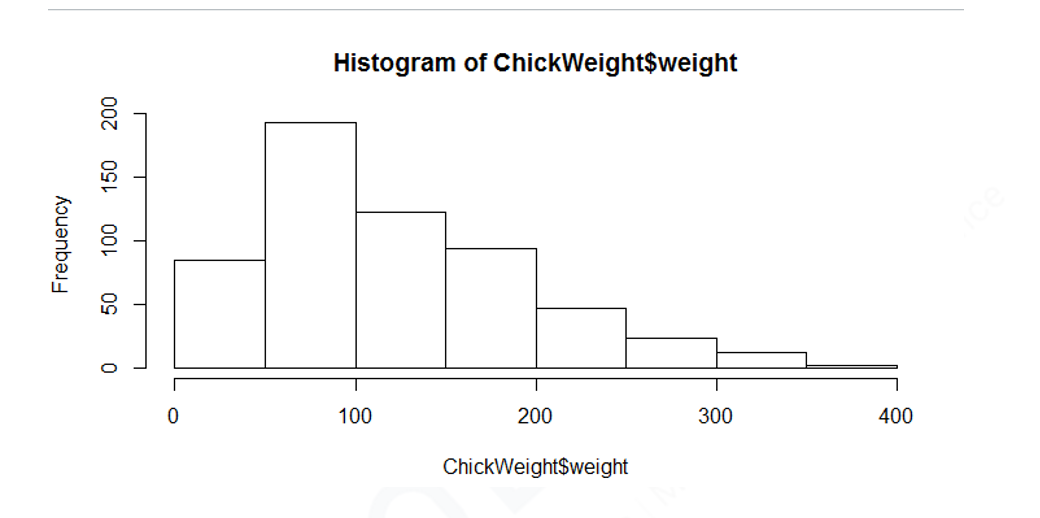

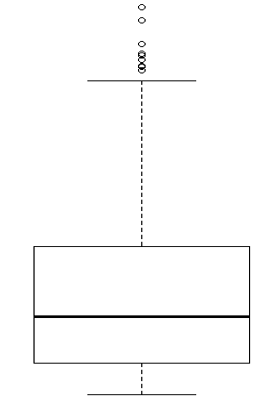

1) Data is right skewed.not normally distributed  
2) mode<median<mean  
3) mode =200  
4) outliers exist on the right skew  
5) Variance is high   
6) Platykurtic  

### Problem3

Q3) Below are the scores obtained by a student in tests   
34,36,36,38,38,39,39,40,40,41,41,41,41,42,42,45,49,56  


1)Find mean, median, variance, standard deviation.

In [78]:
lst = [34,36,36,38,38,39,39,40,40,41,41,41,41,42,42,45,49,56]
df = pd.DataFrame(lst, dtype = int, columns =['values'])

In [79]:
df

,values
0,34
1,36
2,36
3,38
4,38
5,39
6,39
7,40
8,40
9,41


In [83]:
df.values.mean(), df.values.var(), df.values.std()

(41.0, 24.11111111111111, 4.910306620885412)

In [85]:
np.median(lst)

40.5

<AxesSubplot:ylabel='Density'>

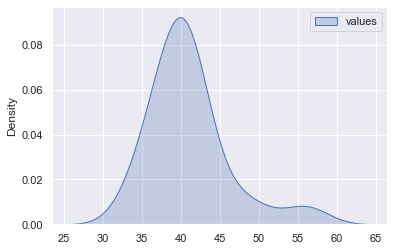

In [86]:
sns.kdeplot(data=df,fill=True,color="navy")

data is right skewed.

<AxesSubplot:xlabel='value', ylabel='variable'>

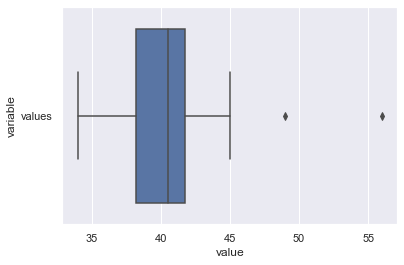

In [87]:
df = pd.DataFrame(data=df, columns=['values'])
sns.boxplot(x="value", y="variable", data=pd.melt(df))

data has outliers

### Problem 5

Q5) What is the nature of skewness when mean, median of data is equal?

Ans : Gaussian

### Problem 6

Q6) What is the nature of skewness when mean > median?

ans: right skew

### Problem 7

Q7) What is the nature of skewness when median > mean?

ans: left skew

### Problem 8

Q8) What does positive kurtosis value indicates for a data?

Ans: A positive excess kurtosis (kurtosis-3) indicates Leptokurtic distribution. 
The leptokurtic distribution shows heavy tails on either side, indicating large outliers. 

### Problem 9

Q9) What does negative kurtosis value indicates for a data?

Ans: A negative kurtosis (kurtosis-3) indicates platykurtic distribution.  
The kurtosis reveals a distribution with flat tails. The flat tails indicate the small outliers in a distribution.

### Problem 10

Q10) Answer the below questions using the below boxplot visualization.

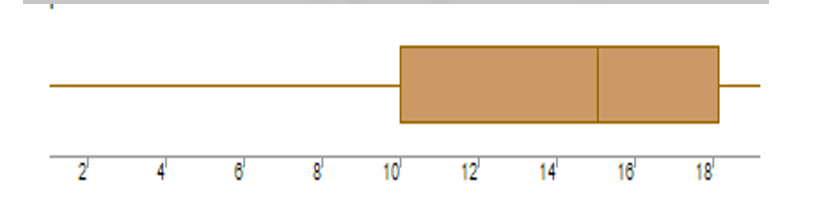

What can we say about the distribution of the data?


Ans: non gaussian

What is nature of skewness of the data?


Ans: left skewed (negative)

What will be the IQR of the data (approximately)? 

Ans: Q3-Q1 = 8

### Problem 11

Q11) Comment on the below Boxplot visualizations? 

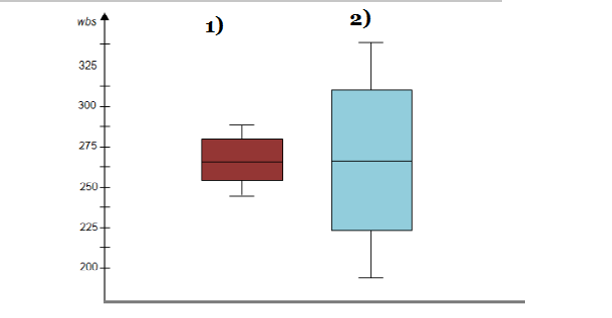

Draw an Inference from the distribution of data for Boxplot 1 with respect Boxplot 2.  
Hint: [On comparing both the plots, and check if the data is normally distributed/not, outliers present, skewness etc.]


Ans:
1) plot 1 distribution is right skewed  
2) plot2 has more variance ans standard deviation compared to plot1  
3) plot2 is normally distributed  
4) both 1 and 2 dont have any outliers  

### Problem 12

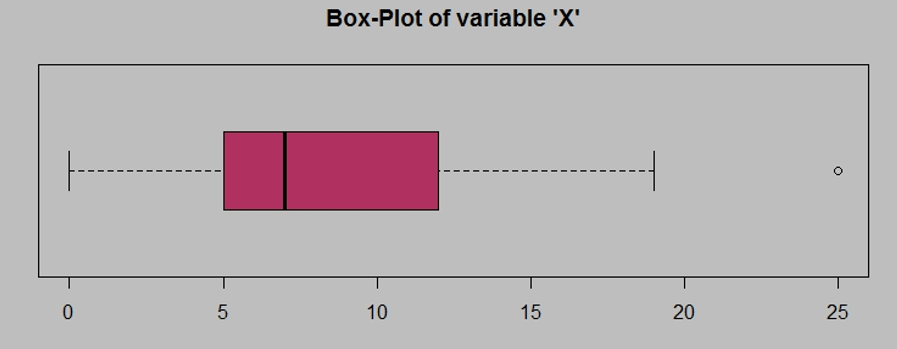

(i)	What is inter-quartile range of this dataset?  [Hint: IQR = Q3 – Q1]  
In one line, explain what this value implies. (Hint: Based on IQR definition)

Ans: Q3-Q1= 12-5= 7

(ii)What can we say about the skewness of this dataset?

Ans: right skewed (positive)

(iii)If it were found that the data point with the value 25 is 2.5, how would the new boxplot be affected?   
(Hint: On changing the data point from 25 to 2.5 in the data, how is it different from the current one.) 

Ans: The boxplot would remain the same . the data would be scaled. the scale would change.

### Problem 13

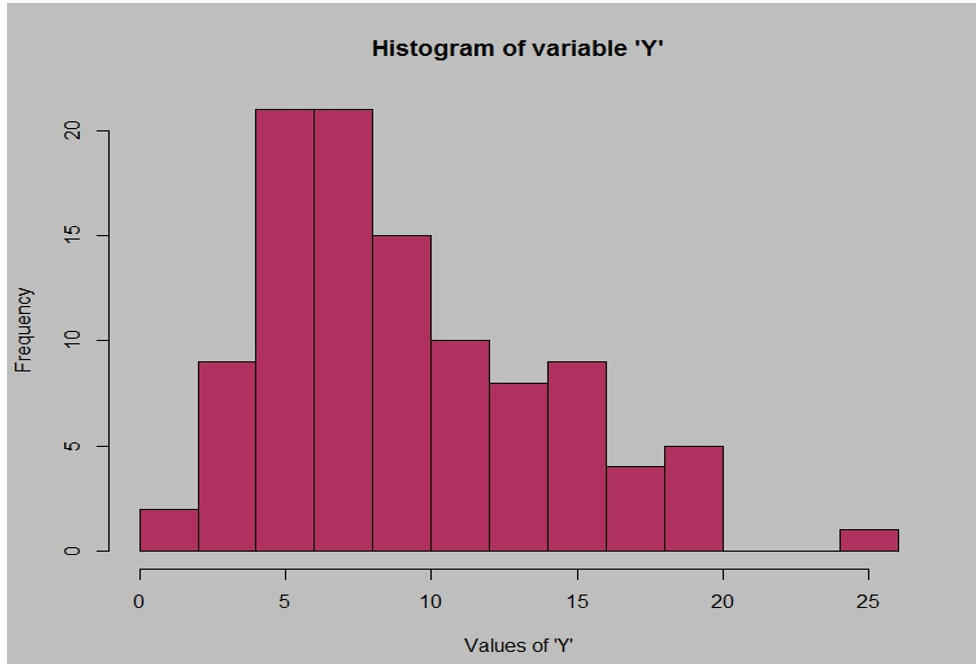

(i)Where would the mode of this dataset lie? Hint: [In terms of values On Y-axis]

Ans : 20

(ii)Comment on the skewness of the dataset

Ans: right skewed (positive)

(iii)Suppose that the above histogram and the boxplot in question 2 are plotted for the same dataset.   
Explain how these graphs complement each other in providing information about any dataset.   
Hint: [Visualizing both the plots, draw the insights]  

Ans: 1) the median on the boxplot would be left shited.  
     2) We would see one outlier beyond the right whisker on the boxplot  